In [13]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [7]:
x=[[0,0,0],[1,1,-1]]
y=[0,1]
clf=svm.SVC(gamma='auto')
clf.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
x

[[0, 0, 0], [1, 1, -1]]

In [8]:
clf.predict([[1,0,1]])

array([0])

In [9]:
#get support vectors
clf.support_vectors_

array([[ 0.,  0.,  0.],
       [ 1.,  1., -1.]])

In [10]:
#get indices of support vectors
clf.support_

array([0, 1], dtype=int32)

In [12]:
#get number of support vectors for each class
clf.n_support_

array([1, 1], dtype=int32)

In [14]:
#we create 40 separateble points
x,y=make_blobs(n_samples=40,centers=2,random_state=6)
x.mean()

0.5492554089596565

In [15]:
x[0:5]

array([[  6.37734541, -10.61510727],
       [  6.50072722,  -3.82403586],
       [  4.29225906,  -8.99220442],
       [  7.39169472,  -3.1266933 ],
       [  7.64306311, -10.02356892]])

In [16]:
y

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [17]:
#fit the model don't regularize  for illussration purposes
clf=svm.SVC(kernel='linear')
clf.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
clf.decision_function(x)

array([ 4.06514436, -1.65754273,  3.23460104, -2.46824087,  3.24794096,
       -1.61411642, -2.52439359, -2.30688147, -1.15108112, -2.52706281,
        2.22684315,  1.9169427 , -3.9997802 ,  3.36587918,  2.23603428,
       -3.56323869, -0.99973162,  4.01793201, -3.3852309 , -1.40793786,
        1.87662501,  1.00026702,  3.57559224,  2.27088304, -2.40126618,
       -2.79232517,  2.95612787,  3.84751299, -1.69242637,  1.84782838,
        0.99946429,  2.60194582,  3.28813056, -3.39869623, -3.23105836,
       -2.44665765, -3.34260134,  2.92408634, -2.27992936,  3.44404718])

In [23]:
clf.support_vectors_

array([[ 7.27059007, -4.84225716],
       [ 5.95313618, -6.82945967],
       [ 7.89359985, -7.41655113]])

In [24]:
clf.coef0 #bias

0.0

In [25]:
clf.coef_

array([[-0.2539717 , -0.83806387]])

In [26]:
clf.classes_

array([0, 1])

/home/manikanta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'color'
  app.launch_new_instance()


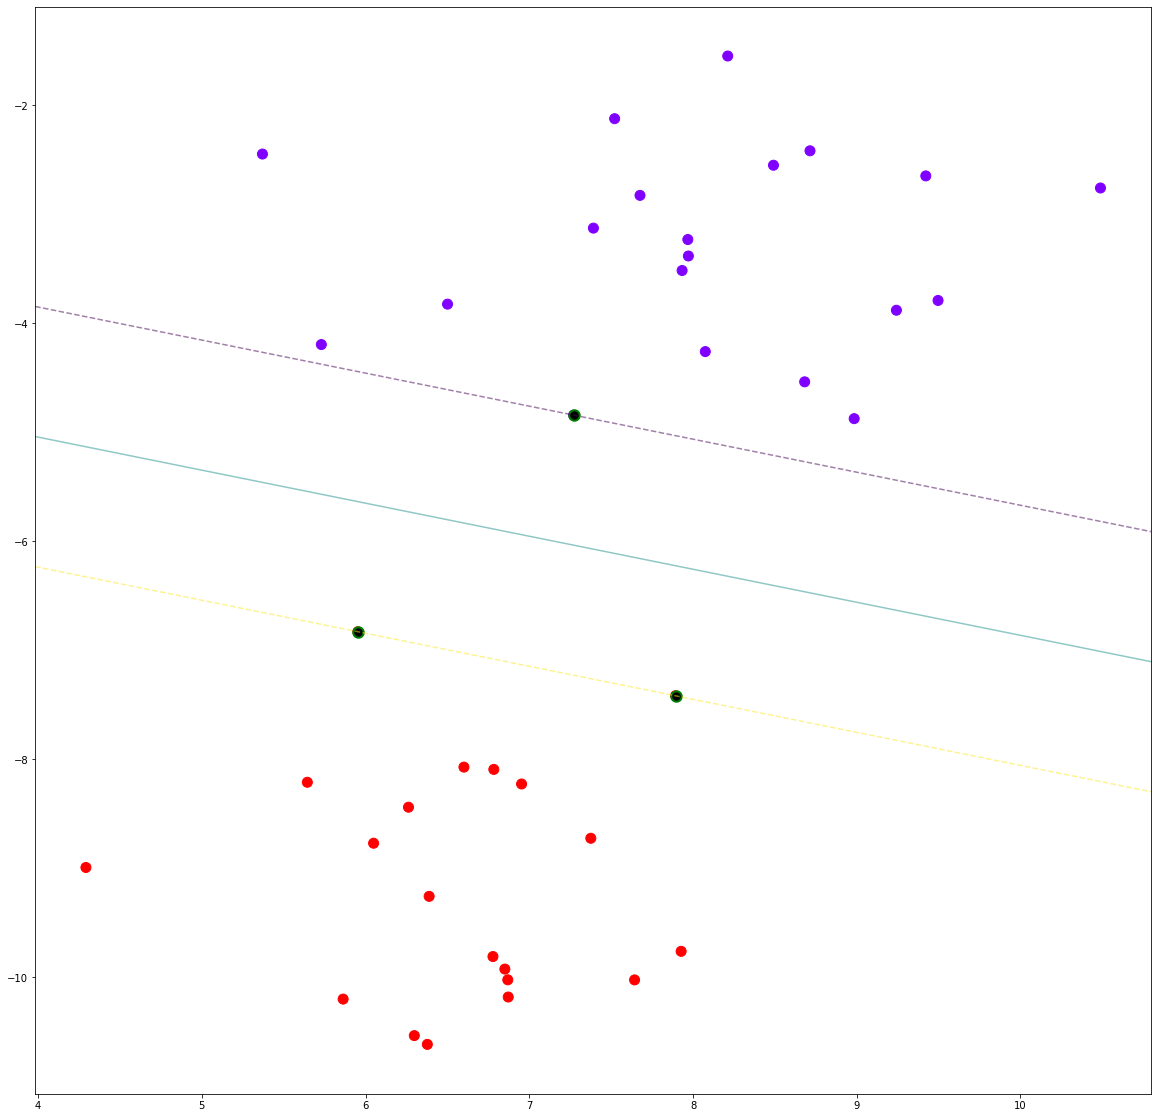

In [30]:
plt.figure(figsize=(20,20))
plt.scatter(x[:,0],x[:,1],c=y,s=100,cmap=plt.cm.rainbow)
#plot the decision function
ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
#creat grid to evaluate model
xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
yy,xx=np.meshgrid(yy,xx)

xy=np.vstack([xx.ravel(),yy.ravel()]).T
z=clf.decision_function(xy).reshape(xx.shape)

#plot decision boundary and margins lines
ax.contour(xx,yy,z,color='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
#plot support vectors
ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=110,linewidth=2,facecolor='k',edgecolors='g')
plt.show()



In [31]:
# svm for using different svm kernels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm

In [32]:
iris=datasets.load_iris()
df_input=pd.DataFrame(iris.data)
df_input.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
df_output=pd.DataFrame(iris.target)
df_output

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [34]:
x=iris.data
y=iris.target

In [35]:
x=x[y!=0,:2]
print(len(x))
y=y[y!=0]
print(y)

100
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [36]:
n_sample=len(x)

np.random.seed(0)
order=np.random.permutation(n_sample)
X=x[order]
Y=y[order].astype(np.float)

In [60]:
x_train=X[:int(.9*n_sample)]
y_train=Y[:int(.9*n_sample)]
x_test=X[int(.9*n_sample)]
y_test=Y[int(.9*n_sample)]


In [63]:
x_test[0]

6.4

In [64]:
x_test[1]

3.1

/home/manikanta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'color'
/home/manikanta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'color'
/home/manikanta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'color'


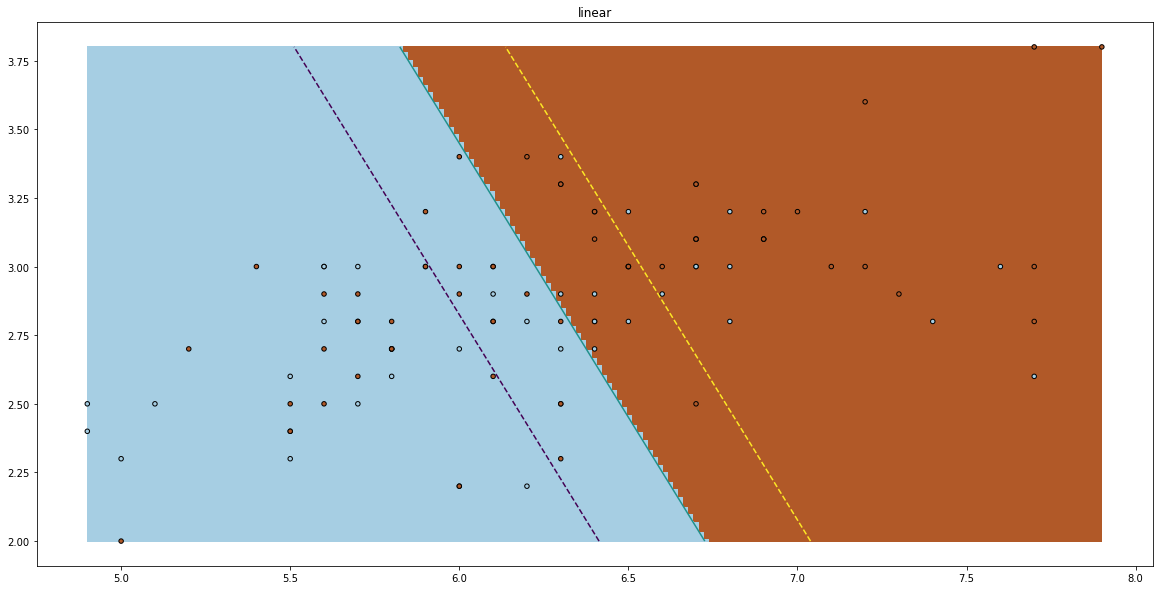

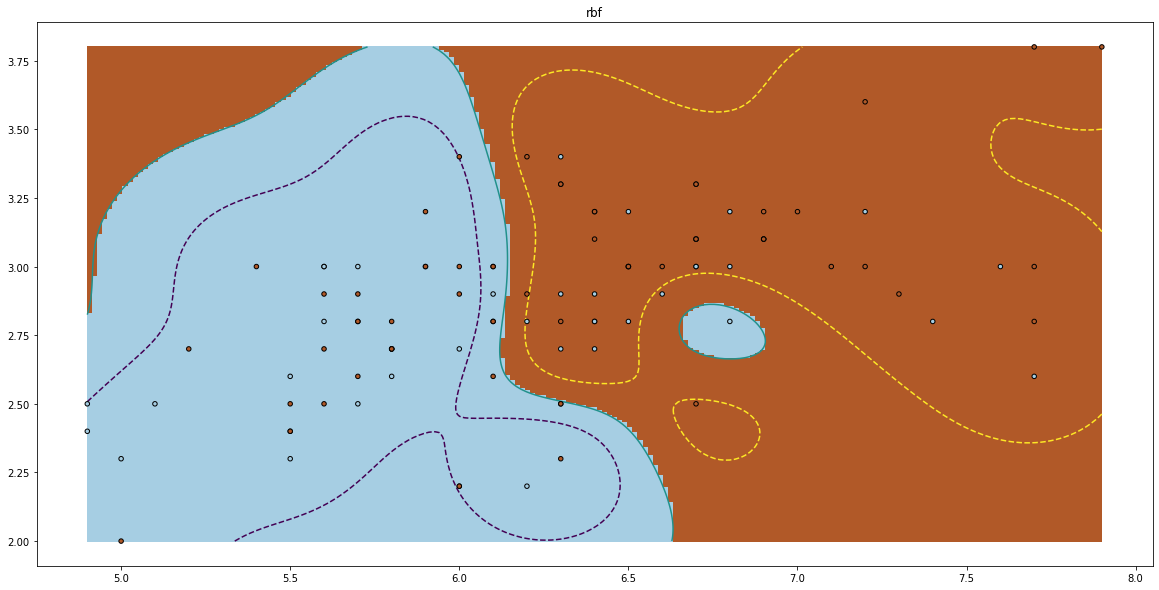

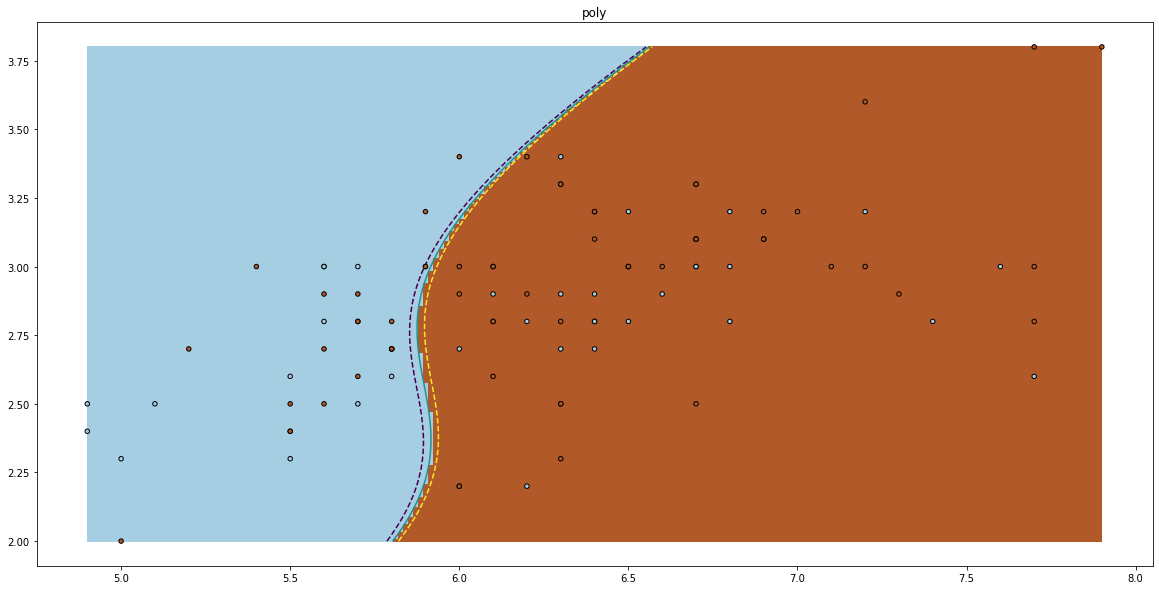

In [66]:
#fit the model
for kernel in ('linear','rbf','poly'):
    clf=svm.SVC(kernel=kernel,gamma=10)
    clf.fit(x_train,y_train)
    
    plt.figure(figsize=(20,10))
    plt.clf()
    plt.scatter(X[:,0],X[:,1],c=y,zorder=10,cmap=plt.cm.Paired,
                edgecolors='k',s=20)
    
    #circle out the test data
    #plt.scatter(x_test[:, 0],x_test[:, 1], s=80,facecolors='none',zorder=10,edgecolors='k')
    
    plt.axis('tight')
    x_min=X[:,0].min()
    x_max=X[:,0].max()
    y_min=X[:,1].min()
    y_max=X[:,1].max()
    
    #creat grid to evaluate model
    xx,yy=np.mgrid[x_min:x_max:200j,y_min:y_max:200j]
    Z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
    # put the result into a color plot
    z=Z.reshape(xx.shape)
    plt.pcolormesh(xx,yy,z>0,cmap=plt.cm.Paired)
    plt.contour(xx,yy,z,color=['k','k','k'],linestyles=['--','-','--'],levels=[-.5,0,.5])
    
    plt.title(kernel)
    
plt.show()

